<a href="https://colab.research.google.com/github/AntonioVidigal/REC_INF_WEB_RED_SOC/blob/main/REC_INF_WEB_RED_Trilha_6_Antonio_Heldo_Vidigal_Machado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
pip install unidecode

In [106]:
#Importação das bibliotecas utilizaas
import json
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')
from unidecode import unidecode
import string
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


Importa o arquivo json fornecido com artigos de vários autores, e filtra pelos artigos do Juca Kfoury

In [114]:
artigos = pd.read_json('https://raw.githubusercontent.com/lucianomcsilva/articulistas/main/UolBlogs.json')
artigos_juca = artigos[artigos['author'] == 'Juca Kfouri'].reset_index(drop=True)
artigos_juca = artigos_juca.replace(r'\n', ' ', regex=True) #Remoção do \n (quebra de linha)
artigos_juca['count_words'] = artigos_juca['content'].str.split().str.len()
artigos_juca = artigos_juca[artigos_juca['count_words'] > 100].reset_index(drop=True)


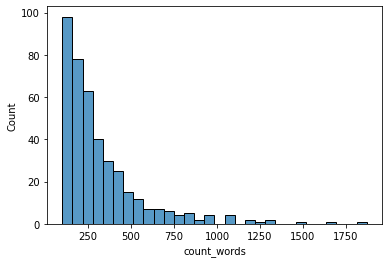

In [115]:
sns.histplot(data=artigos_juca, x='count_words')


In [116]:
stop = stopwords.words('portuguese')
stop2 = list()
for word in stop:
  stop2.append(unidecode(word))
  
stemmer = nltk.stem.RSLPStemmer()

In [117]:
# remoção de palavras de parada
artigos_juca['content_treated'] = artigos_juca['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Transforma em minuscula e remoção de acentos 
artigos_juca['content_treated'] = artigos_juca['content_treated'].str.lower().apply(lambda x: unidecode(x))

# remocação de pontuaçao
artigos_juca['content_treated'] = artigos_juca['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')

# remocação de numeros
artigos_juca['content_treated'] = artigos_juca['content_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada (repescagem)
artigos_juca['content_treated'] = artigos_juca['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))

In [118]:
artigos_juca['count_words_treated'] = artigos_juca['content_treated'].str.split().str.len()

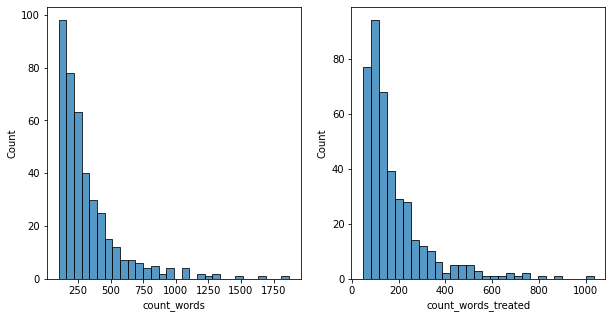

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=artigos_juca, x="count_words", ax=axs[0])
sns.histplot(data=artigos_juca, x="count_words_treated", ax=axs[1])
plt.show()

In [120]:
juca = artigos_juca.sort_values(by='count_words_treated', ascending=False)
juca.head(20)

,author,title,content,count_words,content_treated,count_words_treated
102,Juca Kfouri,O sonho dourado de Willy Meisl,POR PÉRIS RIBEIRO* Tomado de uma avassala...,1870,peris ribeiro tomado avassaladora paixao futeb...,1034
121,Juca Kfouri,Os padecimentos do jovem Adílio,POR PABLO CARDOSO * O Adílio terá nascido aí...,1653,pablo cardoso adilio nascido ai tardar maio fa...,895
26,Juca Kfouri,A palmeirização do São Paulo (e a sãopauliniza...,POR RODRIGO R. MONTEIRO DE CASTRO A frase nã...,1494,rodrigo r monteiro castro frase lamento porque...,821
192,Juca Kfouri,"“Geração 68” entrega Carta Aberta para OAB, AB...",O movimento Geração 68 Sempre na luta fará...,1188,movimento geracao sempre luta fara entrega car...,749
238,Juca Kfouri,Flamengo e a Sociedade Anônima do Futebol: a c...,POR HENRIQUE B. MACHADO MOREIRA* ​Escrevo es...,1288,henrique b machado moreira escrevo artigo aind...,742
93,Juca Kfouri,"O sistema de governação da SAF, conforme a Lei...",POR RODRIGO R. MONTEIRO DE CASTRO A Lei 1...,1228,rodrigo r monteiro castro lei lei saf ainda le...,725
190,Juca Kfouri,Bolsonaristas raiz são 12% da população,Os 12% do presidente – em que lugar da socie...,1337,presidente lugar sociedade habita bolsonarista...,679
395,Juca Kfouri,SAF e o crivo da Academia,POR JOSÉ FRANCISCO C. MANSSUR A aprovação ...,1168,jose francisco c manssur aprovacao senado pl s...,673
248,Juca Kfouri,Uma tomografia completa do Palmeiras,POR JOSÉ LUIZ PORTELLA Palmeiras foi visivel...,1081,jose luiz portella palmeiras visivelmente prej...,628
89,Juca Kfouri,"Informação, acesso à informação e publicidade ...",POR RODRIGO R. MONTEIRO DE CASTRO A Lei 1...,1089,rodrigo r monteiro castro lei lei saf autoria ...,610


Selecionando textos que serão verificados se são do Juca Kfouri. Foi aproveitado o JSON disponibilizado para trazer 2 textos de autores diferentes, e um do próprio Juca Kfouri.

In [121]:
#Textos a Verificar
art_ver1 = artigos.iloc[[0]] 
art_ver2 = artigos.iloc[[5]]
art_ver3 = artigos_juca.iloc[[192]]
ver = art_ver1.append(art_ver2)
ver = ver.append(art_ver3).reset_index(drop=True)
ver.head()


,author,title,content,count_words,content_treated,count_words_treated
0,Josias de Souza,Fantasia de sheik do Zero Três é extravagância...,"\nNuma excursão turística, a \nfoto de Eduard...",NaN,NaN,NaN
1,Josias de Souza,"Chance de TSE cassar Bolsonaro, que já era imp...",\nArma-se no Tribunal Superior Eleitoral o ce...,NaN,NaN,NaN
2,Juca Kfouri,"“Geração 68” entrega Carta Aberta para OAB, AB...",O movimento Geração 68 Sempre na luta fará...,1188.0,movimento geracao sempre luta fara entrega car...,749.0


Tratamento do texto a ser verificado. O texto do Juca Kfouri já foi tratado anteriormente, então não terá mudança neste momento.

In [122]:
# remoção de palavras de parada
ver['content_treated'] = ver['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Transforma em minuscula e remoção de acentos 
ver['content_treated'] = ver['content_treated'].str.lower().apply(lambda x: unidecode(x))

# remocação de pontuaçao
ver['content_treated'] = ver['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')

# remocação de numeros
ver['content_treated'] = ver['content_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada (repescagem)
ver['content_treated'] = ver['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))

In [123]:
ver['count_words'] = ver['content'].str.split().str.len()
ver['count_words_treated'] = ver['content_treated'].str.split().str.len()
ver.head()

,author,title,content,count_words,content_treated,count_words_treated
0,Josias de Souza,Fantasia de sheik do Zero Três é extravagância...,"\nNuma excursão turística, a \nfoto de Eduard...",289,excursao turistica foto eduardo bolsonaro fant...,167
1,Josias de Souza,"Chance de TSE cassar Bolsonaro, que já era imp...",\nArma-se no Tribunal Superior Eleitoral o ce...,430,arma tribunal superior eleitoral cenario rejei...,260
2,Juca Kfouri,"“Geração 68” entrega Carta Aberta para OAB, AB...",O movimento Geração 68 Sempre na luta fará...,1188,movimento geracao sempre luta fara entrega car...,749


In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer()

#Juca Kfouri
XJK = vectorizer.fit_transform(artigos_juca['content_treated'])
vocabulary_jk = vectorizer.get_feature_names()
pdXJK = pd.DataFrame(data=XJK.toarray(), columns=vocabulary_jk) 

#Verificar
XVER = vectorizer.fit_transform(ver['content_treated'])
vocabulary_ver = vectorizer.get_feature_names()
pdXVER = pd.DataFrame(data=XVER.toarray(), columns=vocabulary_ver) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [125]:
len(vocabulary_jk)
df_XJK = pdXJK.T
df_XJK['total_jk'] = df_XJK.sum(axis=1) 

pdXJK


,abafa,abafada,abaixo,abaixou,abajo,abalar,abalaram,abandona,abandonado,abandonados,abandonando,abandonar,abandono,abateu,abc,abdf,abduzido,abel,abeldades,abelha,abelices,abencoe,aberta,abertamente,abertas,aberto,abertos,abertura,abi,abissal,abjeta,abjeto,abnegados,abolicao,abordagem,abordando,abordar,abordavam,abordou,aborrecer,...,york,you,youtube,ytalo,yunes,yuri,zaga,zagueira,zagueirismo,zagueiro,zagueiros,zambelli,zambia,zanocelo,zapelloni,zaracho,zarate,ze,zebra,zebrinha,zeca,zeladores,zelar,zelo,zen,zenit,zero,zeros,zico,ziza,zizinho,zombando,zombeteiros,zona,zoologos,zr,zuenir,zuin,zumbi,zverev
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
# Juca Kfouri
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
df_XJK = pdXJK.T

#Calcula a quantidade de vezes que cada palavra é utilizada
df_XJK['total_jk'] = df_XJK.sum(axis=1) 

#Remove as colunas individuais de cada documento para gerar a tabela
df_XJK.drop(df_XJK.columns[0:len(artigos_juca['content'])], axis=1, inplace=True)

#Ordena o resultado final
df_XJK = df_XJK.sort_values(by='total_jk', ascending=False)

# #Gera a tabela
df_XJK.head(50)

,total_jk
jogo,506
tempo,396
gol,392
futebol,390
porque,350
ser,336
minutos,316
flamengo,306
time,291
fez,284


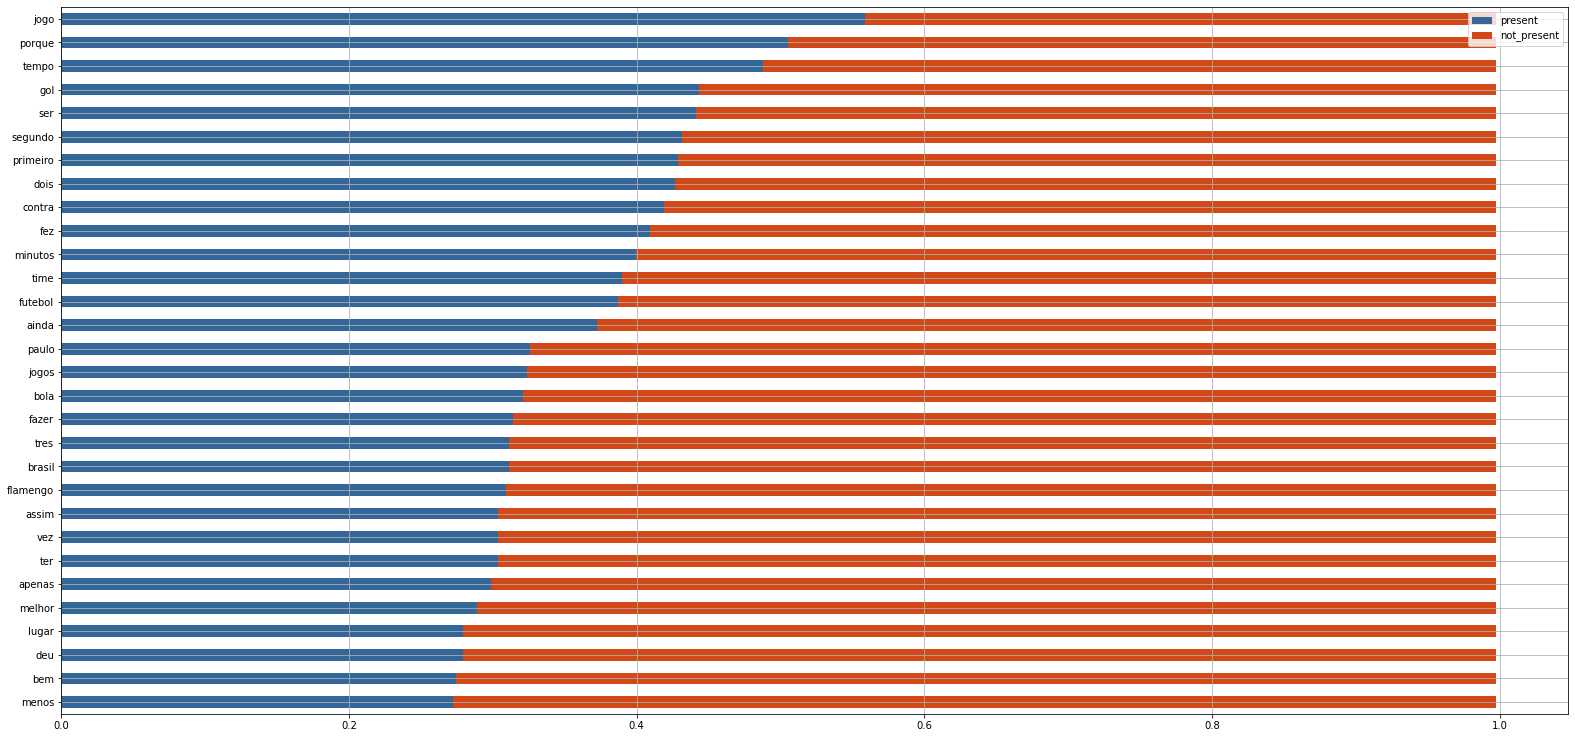

In [128]:
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
pdXJKT = pdXJK.T

#Calcula a quantidade de documetnos que aquela palavra entrou ou nao entrou
pdXJKT['present'] = (pdXJKT.ne(0).sum(axis=1) -1) / len(artigos_juca['content'])
pdXJKT['not_present'] = pdXJKT.eq(0).sum(axis=1) / len(artigos_juca['content'])

#REmove as colunas individuais de cada documento para gerar o grafico
pdXJKT.drop(pdXJKT.columns[0:len(artigos_juca['content'])], axis=1, inplace=True)

#Ordena o resultado final
pdXJKT = pdXJKT.sort_values(by='present', ascending=True)

#Gera o gráfico contendo as 30 palavras mais usadas
pdXJKT.tail(30).plot.barh(stacked=True, color=['#336699', '#D34817'], figsize=(27,13)).grid()


In [129]:
pdXJKT.tail(30)

,present,not_present
menos,0.272059,0.725490
bem,0.274510,0.723039
deu,0.279412,0.718137
lugar,0.279412,0.718137
melhor,0.289216,0.708333
apenas,0.299020,0.698529
ter,0.303922,0.693627
vez,0.303922,0.693627
assim,0.303922,0.693627
flamengo,0.308824,0.688725


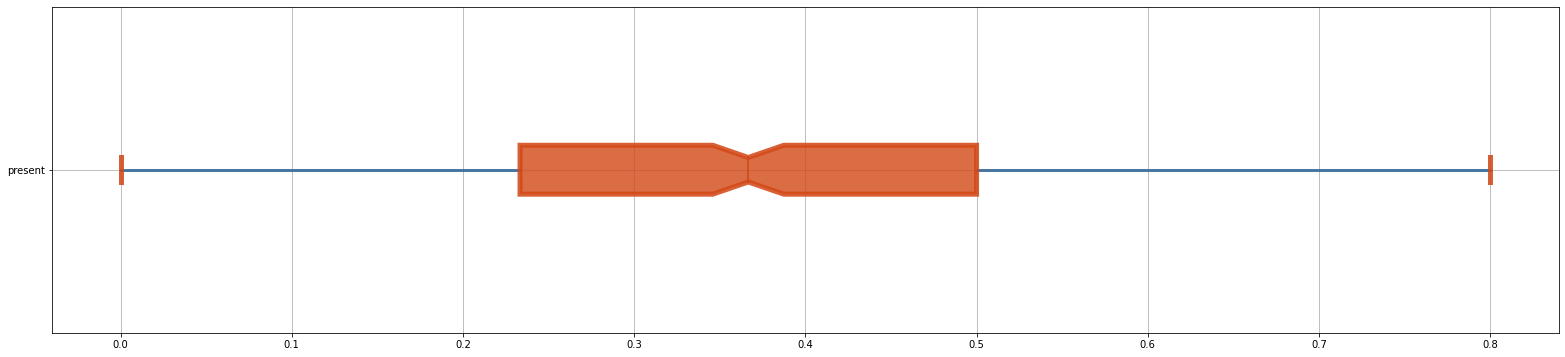

In [130]:
#Reinicia a matriz transposta
pdXJKT = pdXJK.T

#Recalcula tudo (para evitar problemas como ordem de exceução das celulas)
pdXJKT['present'] = (pdXJKT.ne(0).sum(axis=1) -1) / len(artigos_juca['content'])
pdXJKT = pdXJKT.sort_values(by='present', ascending=False)
pdXJKT.drop('present', axis=1, inplace=True)

#Cria uma lista com as 30 palavras mais utilizadas
most_commons = list(pdXJKT.head(30).index.array)

#Filtra as 30 palavras e Traspoe novamente
pdXJKT = pdXJKT.filter(items=most_commons, axis=0).T

# Cria novas colunas com o percentual das 30 palavras mais utilizadas
# presentes em cada corpus
pdXJKT['present'] = (pdXJKT.ne(0).sum(axis=1)) / 30

#Remove as colunas individuais de cada palavra para gerar o grafico
pdXJKT.drop(pdXJKT.columns[0:30], axis=1, inplace=True)

#Gera o gráfico de boxplor 
pdXJKT.boxplot(vert=False, figsize=(27,6), notch=True, patch_artist=True,  # fill with color               
               boxprops=dict(linestyle='-', linewidth=5, color='#D34817DD', facecolor='#D34817CC'),
               medianprops=dict(linestyle='-', linewidth=2,  color='#D34817DD'),
               whiskerprops=dict(linestyle='-', linewidth=3, color='#336699DD'),
               capprops=dict(linestyle='-', linewidth=5,  color='#D34817DD')               
)

In [131]:
#Reinicia a matriz
pdXJKT = pdXJK.T

#Mantem o percentual de frequencia de uso para comparação
pdXJKT['present'] = (pdXJKT.ne(0).sum(axis=1) -1) / len(artigos_juca['content'])

#Ordena
pdXJKT = pdXJKT.sort_values(by='present', ascending=False)

#Mantem so as 30 primeiras palavras
pdXJKT = pdXJKT.head(30)

# Apaga todas as clunas, pois so queremos manter o indice para avaliar os demais textos
pdXJKT.drop(pdXJKT.columns[0:424], axis=1, inplace=True)


# Cria-se o Saco de Paalvara para os 3 textos que se deseja avaliar a autenticidade de Juca Kfouri. 
pdXVERT = pdXVER.T.rename(columns={0: "Texto 1", 1: "Texto 2", 2:"Juca"})

In [132]:
import numpy as np
pd_comp = pd.merge(left=pdXJKT, right=pdXVERT, how='left', left_index=True, right_index=True)
   
pd_comp.replace(np.nan, 0, inplace=True)
pd_compT = pd_comp.T

pd_compT['most_commons'] = (pd_compT.ne(0).sum(axis=1)) / 30
pd_compT.T.round(2).loc['most_commons']



Texto 1    0.20
Texto 2    0.17
Juca       0.33
Name: most_commons, dtype: float64